In [39]:
pacman::p_load(ggplot2,reshape2,dplyr,tidyr,data.table,ggupset,ggridges)

In [21]:
orthofinder_dir = file.path("..","..","mmetsp_metatranscriptomes","orthofinder")
results_fold = "Results_Jul17"

[1] "orthofinder_1"
[1] "orthofinder_2"


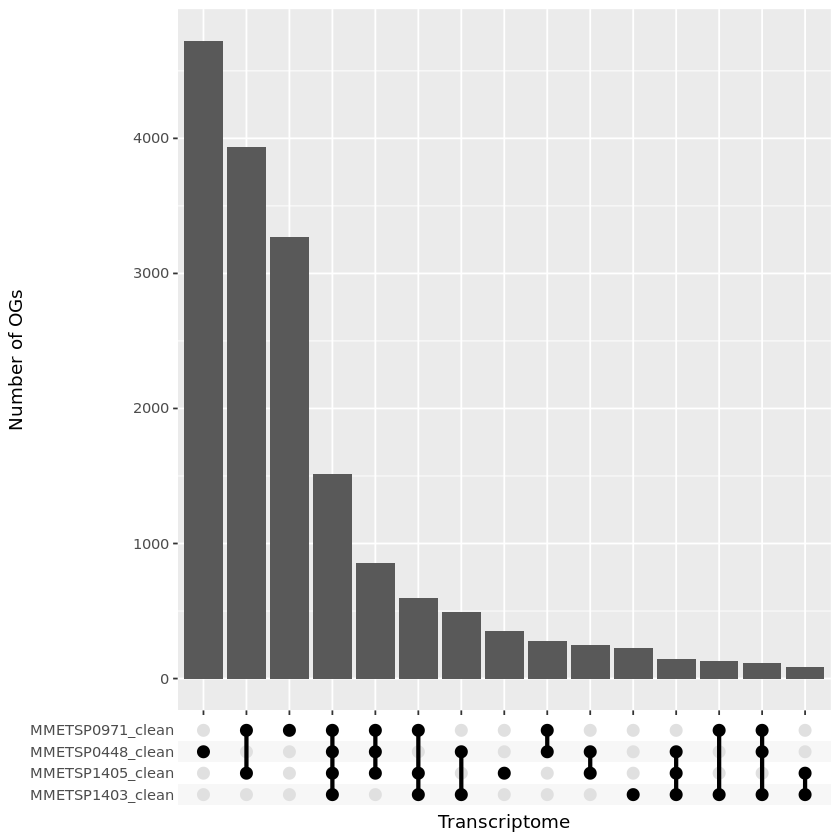

[1] "orthofinder_3"


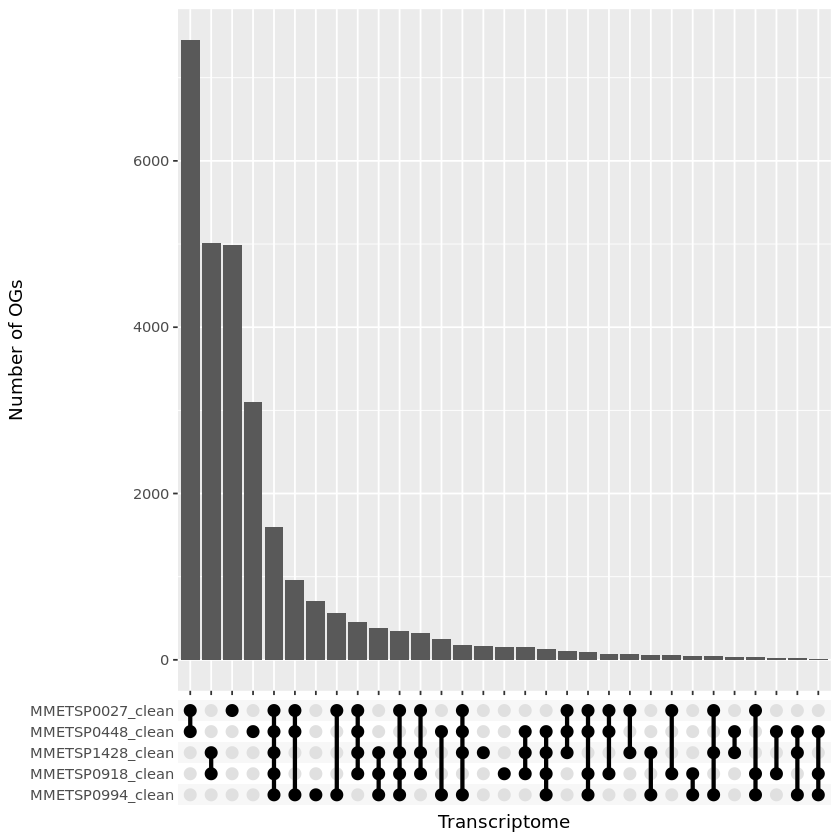

[1] "orthofinder_4"


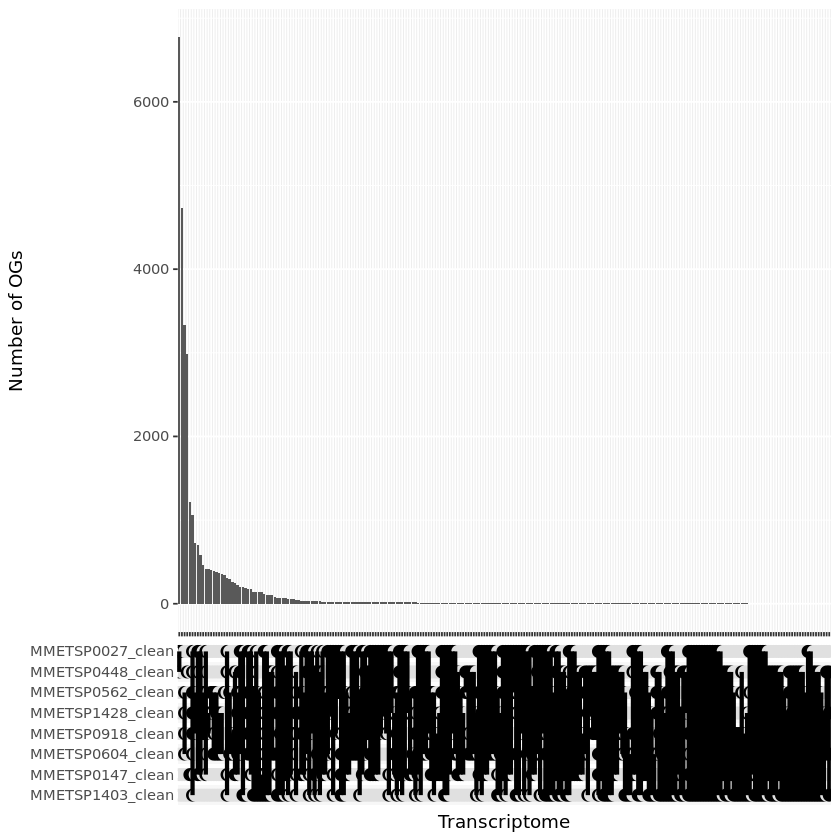

[1] "orthofinder_6"


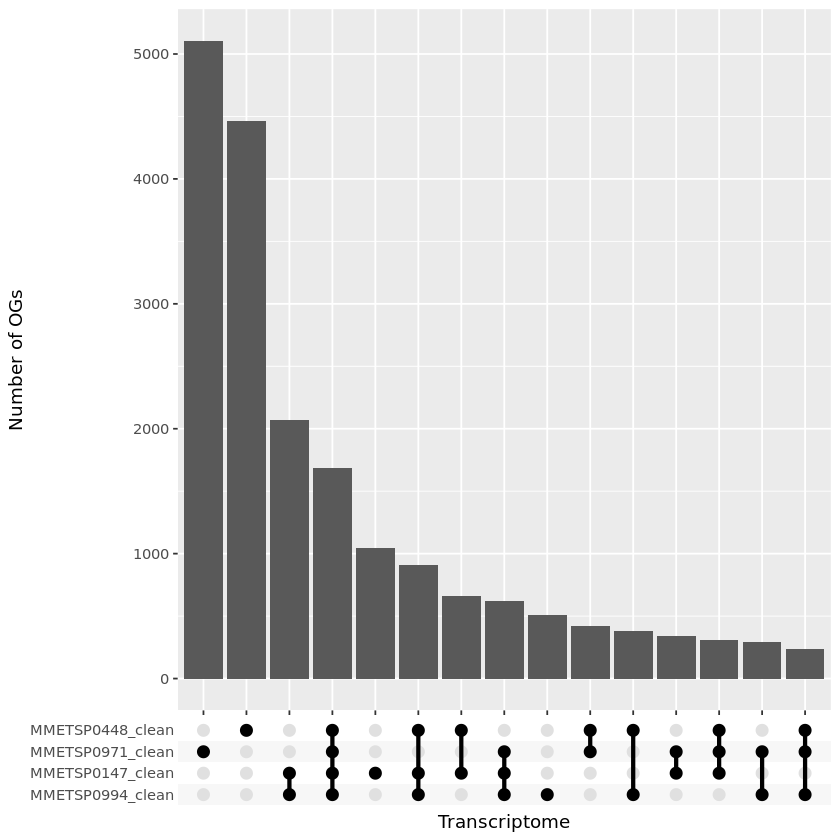

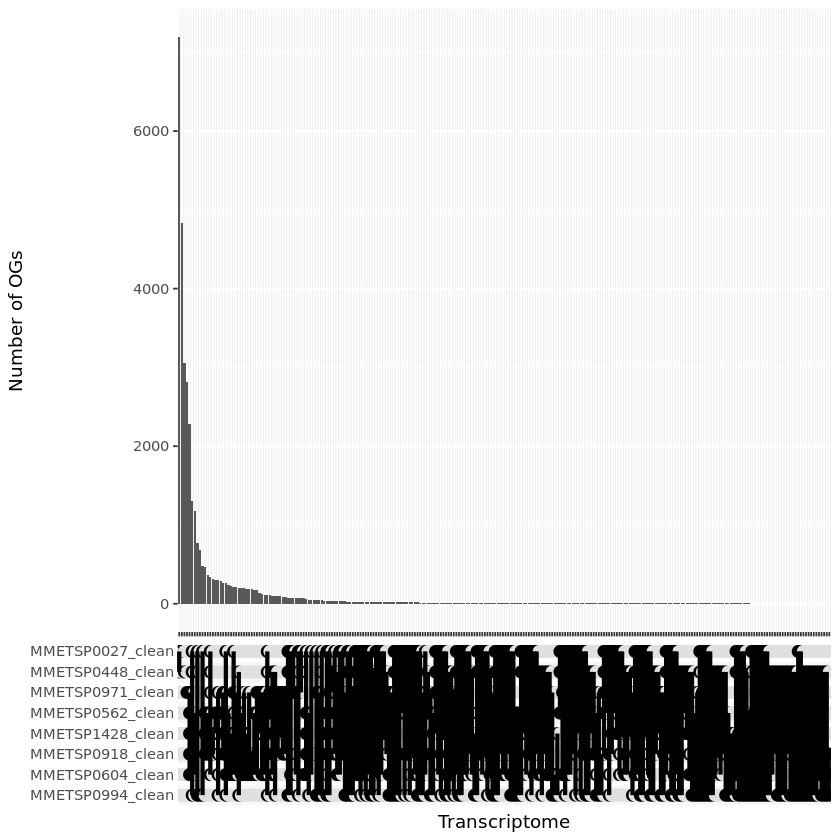

In [57]:
for (dir in list.files(orthofinder_dir)) {
    if (!(file.exists(file.path(orthofinder_dir, dir, results_fold,
                       "Orthogroups","Orthogroups.GeneCount.tsv")))) {
        next
    }
    gene_ct = read.csv(file.path(orthofinder_dir, dir, results_fold,
                       "Orthogroups","Orthogroups.GeneCount.tsv"),sep="\t")
    orthogroups = read.csv(file.path(orthofinder_dir, dir, results_fold,
                       "Orthogroups","Orthogroups.tsv"),sep="\t")
    grouped_up = gene_ct %>% dplyr::select(-Total) %>% 
        tidyr::pivot_longer(cols = starts_with("MMETSP"), names_to = "Transcriptome",
                            values_to = "Count") %>%
        dplyr::filter(Count > 0) %>%
        group_by(Orthogroup) %>%
        summarize(Transcriptome = list(Transcriptome))
    print(dir)
    print(ggplot(grouped_up, aes(x = Transcriptome)) +
        geom_bar() +
        scale_x_upset() + ylab("Number of OGs"))
}

# A tibble: 6 x 2
  Orthogroup Transcriptome
  <chr>      <list>       
1 OG0000000  <chr [4]>    
2 OG0000001  <chr [1]>    
3 OG0000002  <chr [2]>    
4 OG0000003  <chr [2]>    
5 OG0000004  <chr [1]>    
6 OG0000005  <chr [1]>    


,Orthogroup,MMETSP0027_clean,MMETSP0448_clean,MMETSP0918_clean,MMETSP0994_clean,MMETSP1428_clean,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,OG0000000,1,3,188,0,2,194
2,OG0000009,30,34,7,8,8,87
3,OG0000011,4,1,7,0,67,79
4,OG0000012,3,1,46,1,26,77
5,OG0000013,48,6,7,8,6,75
6,OG0000014,30,23,3,13,3,72


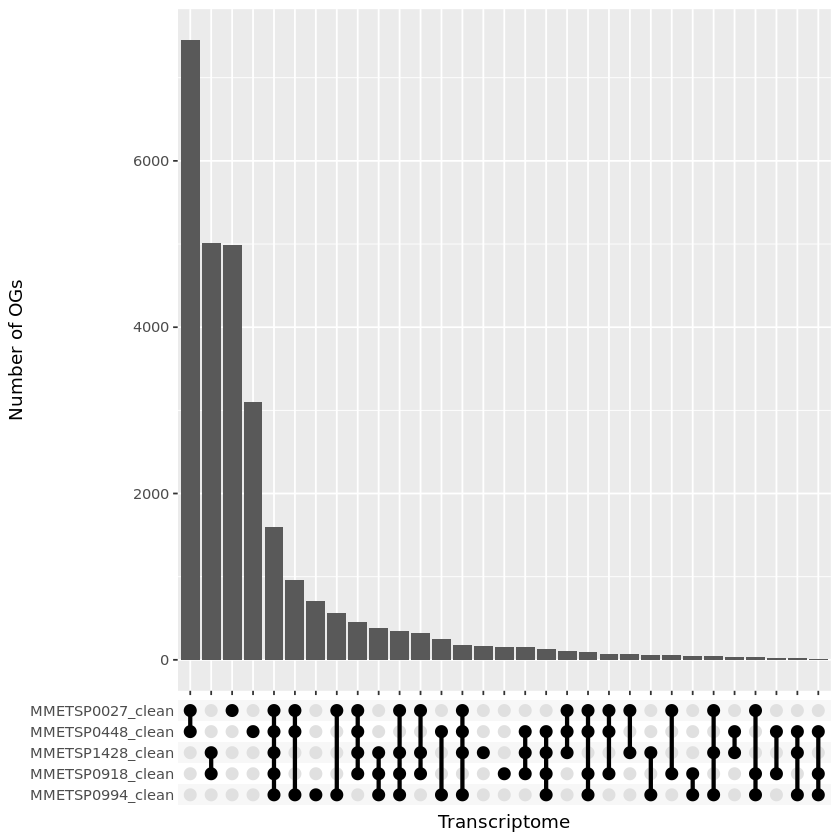

In [32]:
## Looking specifically at community 2
dir = "orthofinder_2"
if (!(file.exists(file.path(orthofinder_dir, dir, results_fold,
                   "Orthogroups","Orthogroups.GeneCount.tsv")))) {
    next
}
gene_ct = read.csv(file.path(orthofinder_dir, dir, results_fold,
                   "Orthogroups","Orthogroups.GeneCount.tsv"),sep="\t")
orthogroups = read.csv(file.path(orthofinder_dir, dir, results_fold,
                   "Orthogroups","Orthogroups.tsv"),sep="\t")
grouped_up = gene_ct %>% dplyr::select(-Total) %>% 
    tidyr::pivot_longer(cols = starts_with("MMETSP"), names_to = "Transcriptome",
                        values_to = "Count") %>%
    dplyr::filter(Count > 0) %>%
    group_by(Orthogroup) %>%
    summarize(Transcriptome = list(Transcriptome))
print(head(grouped_up))
print(ggplot(grouped_up, aes(x = Transcriptome)) +
    geom_bar() +
    scale_x_upset() + ylab("Number of OGs"))

head(gene_ct %>% dplyr::filter((MMETSP1428_clean != 0) & (MMETSP0918_clean != 0)))

Picking joint bandwidth of 0.17



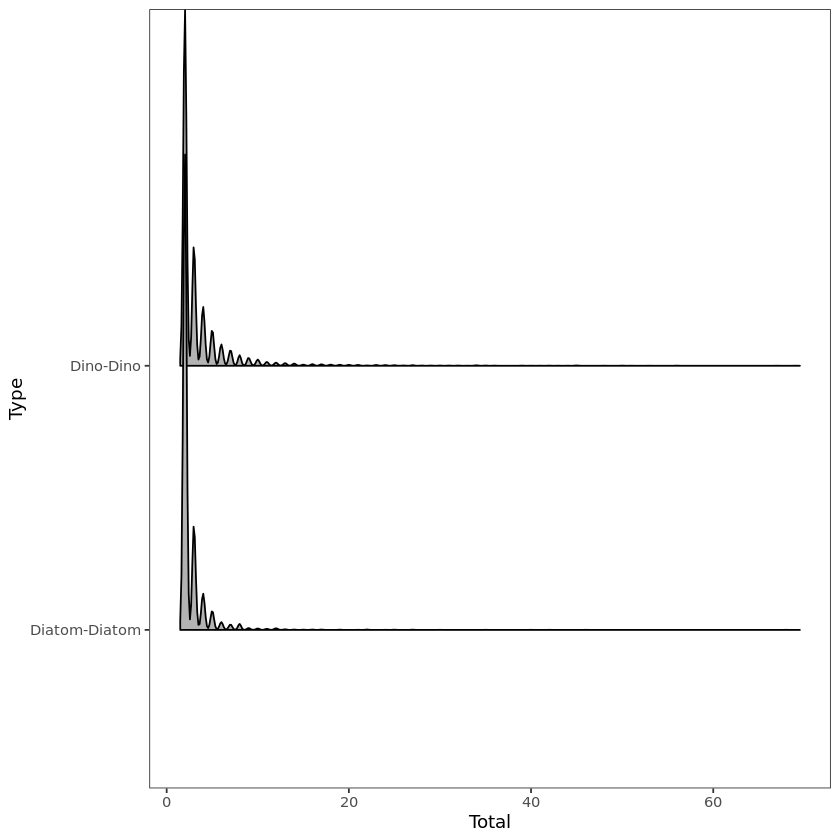

In [45]:
# 918 = marinoi1, 1428 = marinoi2
# 0027 = Karenia, 448 = heterocapsa
just_diatom = gene_ct %>% dplyr::filter((MMETSP1428_clean != 0) & (MMETSP0918_clean != 0) & 
                          (MMETSP0448_clean == 0) & (MMETSP0027_clean == 0))
just_dinoflagellate = gene_ct %>% dplyr::filter((MMETSP1428_clean == 0) & (MMETSP0918_clean == 0) & 
                          (MMETSP0448_clean != 0) & (MMETSP0027_clean != 0))
for_ridge = just_diatom %>% dplyr::mutate(Type = "Diatom-Diatom") %>%
    bind_rows(just_dinoflagellate %>% dplyr::mutate(Type = "Dino-Dino"))
ggplot(for_ridge) + geom_density_ridges2(aes(x = Total, y = Type)) + theme_test()

In [49]:
mmetsp_completeness = read.csv(file.path("..","..","mmetsp_metatranscriptomes","MMETSP_busco.csv"))

In [52]:
mmetsp_completeness %>% dplyr::filter(X %in% c("MMETSP0918","MMETSP0027","MMETSP1428","MMETSP0448"))

X,Complete,Fragmented,Missing,Total,Complete_BUSCO_perc
<chr>,<int>,<int>,<int>,<int>,<dbl>
MMETSP0448,185,51,67,303,0.6105611
MMETSP0027,201,44,58,303,0.6633663
MMETSP1428,196,71,36,303,0.6468647
MMETSP0918,181,73,49,303,0.5973597


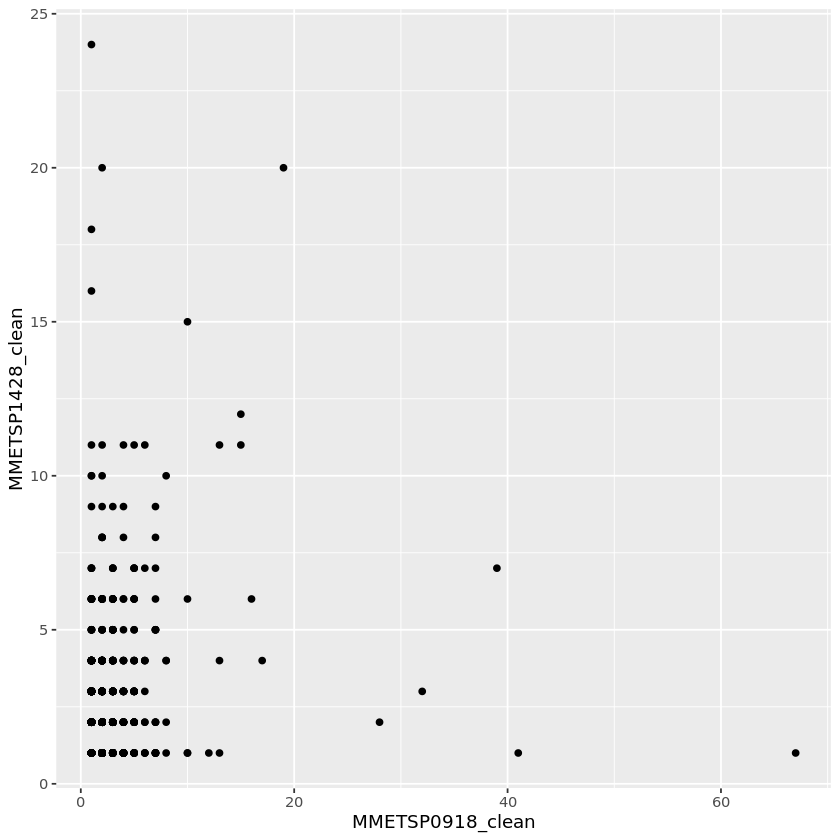

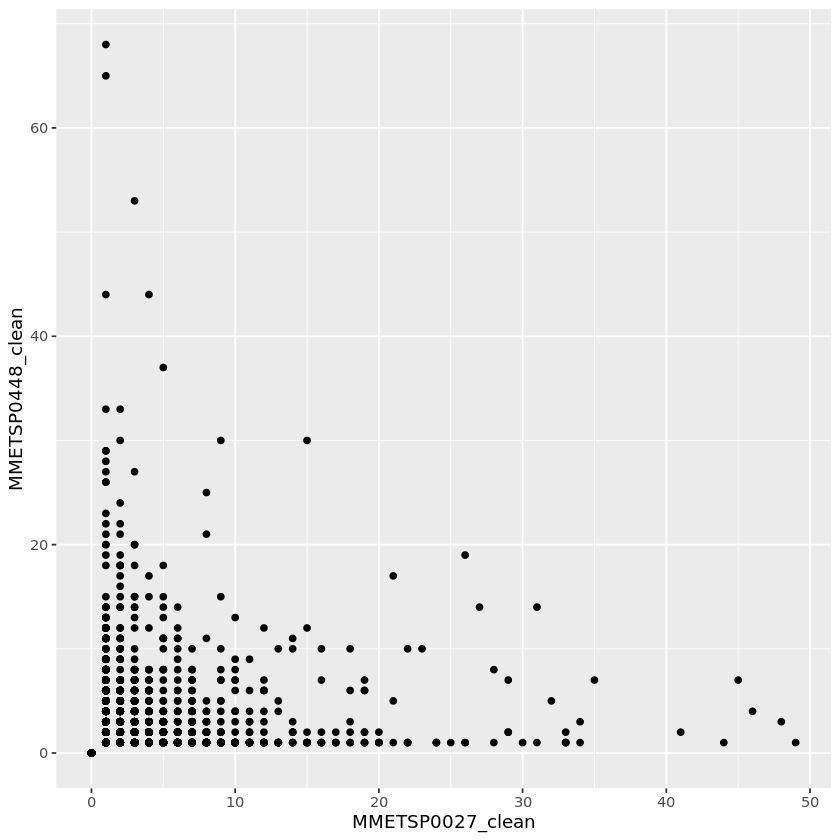

In [56]:
ggplot(for_ridge %>% dplyr::filter((MMETSP0918_clean != 0) & (MMETSP1428_clean != 0))) + 
    geom_point(aes(x = MMETSP0918_clean, y = MMETSP1428_clean))
ggplot(for_ridge) + geom_point(aes(x = MMETSP0027_clean, y = MMETSP0448_clean))

In [ ]:
head(orthogroups)

,Orthogroup,MMETSP0027_clean,MMETSP0448_clean,MMETSP0562_clean,MMETSP0604_clean,MMETSP0918_clean,MMETSP0971_clean,MMETSP0994_clean,MMETSP1428_clean
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,OG0000000,"CAMPEP_0173706530, CAMPEP_0173714108, CAMPEP_0173738624, CAMPEP_0173747116, CAMPEP_0173750140","CAMPEP_0195118450, CAMPEP_0195146120","CAMPEP_0206640536, CAMPEP_0206641334, CAMPEP_0206642924, CAMPEP_0206643392, CAMPEP_0206646682, CAMPEP_0206647210, CAMPEP_0206648094, CAMPEP_0206649558, CAMPEP_0206650712, CAMPEP_0206653146, CAMPEP_0206653214, CAMPEP_0206654734, CAMPEP_0206659482, CAMPEP_0206659522, CAMPEP_0206659540, CAMPEP_0206659566, CAMPEP_0206659568, CAMPEP_0206659576, CAMPEP_0206659584, CAMPEP_0206659594, CAMPEP_0206659604, CAMPEP_0206659628, CAMPEP_0206659654, CAMPEP_0206659672, CAMPEP_0206659736, CAMPEP_0206659826, CAMPEP_0206659844, CAMPEP_0206659864, CAMPEP_0206659922, CAMPEP_0206660008, CAMPEP_0206660084, CAMPEP_0206660098, CAMPEP_0206660168, CAMPEP_0206660278, CAMPEP_0206660330, CAMPEP_0206660338, CAMPEP_0206660358, CAMPEP_0206660428, CAMPEP_0206660464, CAMPEP_0206660498, CAMPEP_0206660516, CAMPEP_0206660600, CAMPEP_0206660692, CAMPEP_0206660698, CAMPEP_0206660710, CAMPEP_0206660866, CAMPEP_0206660880, CAMPEP_0206660884, CAMPEP_0206660900, CAMPEP_0206661272, CAMPEP_0206661514, CAMPEP_0206661534, CAMPEP_0206661604, CAMPEP_0206661644, CAMPEP_0206661926, CAMPEP_0206661968, CAMPEP_0206662086, CAMPEP_0206662264, CAMPEP_0206662500, CAMPEP_0206662542, CAMPEP_0206662556, CAMPEP_0206662614, CAMPEP_0206662750, CAMPEP_0206662854, CAMPEP_0206663004, CAMPEP_0206663130, CAMPEP_0206663142, CAMPEP_0206663244, CAMPEP_0206663296, CAMPEP_0206663524, CAMPEP_0206663586, CAMPEP_0206663846, CAMPEP_0206663866, CAMPEP_0206663918, CAMPEP_0206663924, CAMPEP_0206663936, CAMPEP_0206664016, CAMPEP_0206664234, CAMPEP_0206664330, CAMPEP_0206664638, CAMPEP_0206664822, CAMPEP_0206665104, CAMPEP_0206665864, CAMPEP_0206665990, CAMPEP_0206666388, CAMPEP_0206666430, CAMPEP_0206666434, CAMPEP_0206666522, CAMPEP_0206666638, CAMPEP_0206666728, CAMPEP_0206666848, CAMPEP_0206667088, CAMPEP_0206667206, CAMPEP_0206668656, CAMPEP_0206668874, CAMPEP_0206669016, CAMPEP_0206669494, CAMPEP_0206669568, CAMPEP_0206670044, CAMPEP_0206670050, CAMPEP_0206670094, CAMPEP_0206670108, CAMPEP_0206670150, CAMPEP_0206670260, CAMPEP_0206670362, CAMPEP_0206670364, CAMPEP_0206670424, CAMPEP_0206670486, CAMPEP_0206671322, CAMPEP_0206671372, CAMPEP_0206671488, CAMPEP_0206671768, CAMPEP_0206672582, CAMPEP_0206673256, CAMPEP_0206673836, CAMPEP_0206677612, CAMPEP_0206680656, CAMPEP_0206680692, CAMPEP_0206681686, CAMPEP_0206682554, CAMPEP_0206685226","CAMPEP_0183675160, CAMPEP_0183675172, CAMPEP_0183675198, CAMPEP_0183675358, CAMPEP_0183675364, CAMPEP_0183675502, CAMPEP_0183675572, CAMPEP_0183675660, CAMPEP_0183675904, CAMPEP_0183675928, CAMPEP_0183676016, CAMPEP_0183676108, CAMPEP_0183676190, CAMPEP_0183676318, CAMPEP_0183676344, CAMPEP_0183676498, CAMPEP_0183676538, CAMPEP_0183676670, CAMPEP_0183676680, CAMPEP_0183676928, CAMPEP_0183677008, CAMPEP_0183677088, CAMPEP_0183677128, CAMPEP_0183677216, CAMPEP_0183677500, CAMPEP_0183677514, CAMPEP_0183677834, CAMPEP_0183678082, CAMPEP_0183678116, CAMPEP_0183678570, CAMPEP_0183678690, CAMPEP_0183679028, CAMPEP_0183679138, CAMPEP_0183679230, CAMPEP_0183679286, CAMPEP_0183679762, CAMPEP_0183679810, CAMPEP_0183680346, CAMPEP_0183680518, CAMPEP_0183680874, CAMPEP_0183680906, CAMPEP_0183681152, CAMPEP_0183681986, CAMPEP_0183682416, CAMPEP_0183682728, CAMPEP_0183682742, CAMPEP_0183682986, CAMPEP_0183683174, CAMPEP_0183685656, CAMPEP_0183686004, CAMPEP_0183686328, CAMPEP_0183686408, CAMPEP_0183686460, CAMPEP_0183686686, CAMPEP_0183687884, CAMPEP_0183688006, CAMPEP_0183690388, CAMPEP_0183690730, CAMPEP_0183691268, CAMPEP_0183691358, CAMPEP_0183691820, CAMPEP_0183692294, CAMPEP_0183693134, CAMPEP_0183694058, CAMPEP_0183695302, CAMPEP_0183695356, CAMPEP_0183696086, CAMPEP_0183697418, CAMPEP_0183697996, CAMPEP_0183698818, CAMPEP_0183699418, 

In [54]:
for_ridge

Orthogroup,MMETSP0027_clean,MMETSP0448_clean,MMETSP0918_clean,MMETSP0994_clean,MMETSP1428_clean,Total,Type
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
OG0000018,0,0,67,0,1,68,Diatom-Diatom
OG0000057,0,0,39,0,7,46,Diatom-Diatom
OG0000074,0,0,41,0,1,42,Diatom-Diatom
OG0000088,0,0,19,1,20,40,Diatom-Diatom
OG0000109,0,0,32,0,3,35,Diatom-Diatom
OG0000162,0,0,28,0,2,30,Diatom-Diatom
OG0000211,0,0,15,0,12,27,Diatom-Diatom
OG0000212,0,0,15,1,11,27,Diatom-Diatom
OG0000253,0,0,10,0,15,25,Diatom-Diatom
